## Imports

In [1]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
df = pd.read_csv('interview_analysis_molecule_x_10mg_v1.tsv', sep='\t')

In [3]:
df.head(5)

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,maximum_price_allowed,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price
0,1,2013-05-16,2013-05-24,10,won,NaN,buyer_1,region_1,C07AB07,39,...,0.10000,molecule_x,10mg,participants_16,0.0004,2013-05-01,participants_16,0.00040,NaN,NaN
1,2,2013-04-29,2013-06-21,0,won,NaN,buyer_2,region_2,C07AB07,48,...,63442.21000,molecule_x,10mg,participants_16,0.007,2013-04-01,participants_16,0.00700,NaN,NaN
2,3,2013-06-09,2014-08-14,6,won,lost,buyer_3,region_3,C07AB07,12,...,0.11635,molecule_x,10mg,participants_16|participants_23,0.014|0.07071,2013-06-01,participants_16,0.01400,participants_23,0.07071
3,4,2013-05-04,2013-05-17,19,won,NaN,buyer_4,region_4,C07AB07,36,...,0.03000,molecule_x,10mg,participants_16,0.025,2013-05-01,participants_16,0.02500,NaN,NaN
4,5,2013-12-18,2013-12-17,6,won,NaN,buyer_5,region_5,C07AB07,36,...,0.00010,molecule_x,10mg,participants_16,1e-05,2013-12-01,participants_16,0.00001,NaN,NaN


## Date Issues

In [4]:
df['actual_months'] = ((df['end_date_extension'].astype('datetime64[ns]') - 
                      df['start_date'].astype('datetime64[ns]'))
                     /np.timedelta64(1, 'M')).astype(int)
df_dates = df[['contract_id','published_date','start_date','end_date_extension','duration','duration_extension','actual_months']]
df_dates['correct_duration'] = df_dates.apply(lambda x: True if x.duration + x.duration_extension == x.actual_months else False, axis=1)
df_dates['publish_before_start'] = df_dates.apply(lambda x: True if x.published_date < x.start_date else False, axis=1)

df_dates

,contract_id,published_date,start_date,end_date_extension,duration,duration_extension,actual_months,correct_duration,publish_before_start
0,1,2013-05-16,2013-05-24,2017-06-30,39,10,49,True,True
1,2,2013-04-29,2013-06-21,2017-06-30,48,0,48,True,True
2,3,2013-06-09,2014-08-14,2016-02-14,12,6,18,True,True
3,4,2013-05-04,2013-05-17,2017-12-31,36,19,55,True,True
4,5,2013-12-18,2013-12-17,2017-06-30,36,6,42,True,False
5,6,2013-12-06,2014-02-21,2019-04-20,48,14,61,False,True
6,7,2014-02-24,2014-01-01,2015-03-31,12,3,14,False,False
7,8,2014-03-08,2014-05-22,2018-03-22,36,10,45,False,True
8,9,2014-03-18,2014-05-30,2016-11-29,24,6,30,True,True
9,10,2014-09-07,2014-08-31,2020-03-31,36,7,66,False,False


## Show Outliers

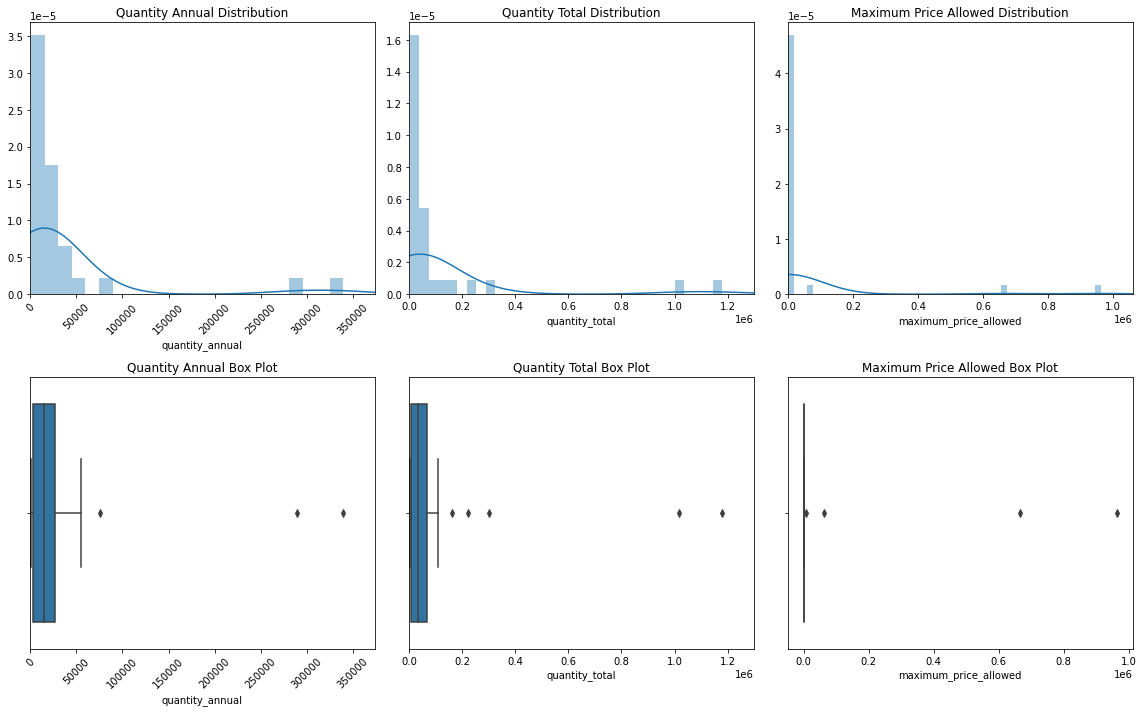

In [5]:
fig, ax = plt.subplots(2,3,figsize=(16,10))

sns.distplot(df['quantity_annual'], ax=ax[0,0])
ax[0,0].set_title('Quantity Annual Distribution')
ax[0,0].set(xlim=(0, df['quantity_annual'].max()*1.1))
ax[0,0].tick_params(axis='x', rotation=45)
sns.distplot(df['quantity_total'], ax=ax[0,1])
ax[0,1].set_title('Quantity Total Distribution')
ax[0,1].set(xlim=(0, df['quantity_total'].max()*1.1))
sns.distplot(df['maximum_price_allowed'], ax=ax[0,2])
ax[0,2].set_title('Maximum Price Allowed Distribution')
ax[0,2].set(xlim=(0, df['maximum_price_allowed'].max()*1.1))

sns.boxplot(df['quantity_annual'], ax=ax[1,0])
ax[1,0].set_title('Quantity Annual Box Plot')
ax[1,0].set(xlim=(0, df['quantity_annual'].max()*1.1))
ax[1,0].tick_params(axis='x', rotation=45)
sns.boxplot(df['quantity_total'], ax=ax[1,1])
ax[1,1].set_title('Quantity Total Box Plot')
ax[1,1].set(xlim=(0, df['quantity_total'].max()*1.1))
sns.boxplot(df['maximum_price_allowed'], ax=ax[1,2])
ax[1,2].set_title('Maximum Price Allowed Box Plot')
# ax[1,2].set(xlim=(-1, df['maximum_price_allowed'].max()*1.1))

fig.tight_layout()
fig.show()

## Automatically Remove Outliers

### Z Score has issues due to how extreme some values are, its not detecting some anomalies

In [6]:
df_z = df[["contract_id","maximum_price_allowed"]]

In [7]:
df_z["maximum_price_allowed_z_value"] = (
        df_z["maximum_price_allowed"] - df_z["maximum_price_allowed"].mean()
    )/df_z["maximum_price_allowed"].std(ddof=0)

In [8]:
df_z[["contract_id","maximum_price_allowed","maximum_price_allowed_z_value"]].sort_values(by=['maximum_price_allowed_z_value'], ascending=False).head(10)

,contract_id,maximum_price_allowed,maximum_price_allowed_z_value
23,24,963542.28000,4.470488
10,11,664493.87000,2.999377
1,2,63442.21000,0.042620
13,14,6647.87200,-0.236768
2,3,0.11635,-0.269471
14,15,0.10900,-0.269471
0,1,0.10000,-0.269471
30,31,0.09322,-0.269471
7,8,0.08000,-0.269471
19,20,0.07971,-0.269471


### Interquartile Range 

In [9]:
def get_iqr(x):
    q3,q1 = np.percentile(x, [75, 25])
    iqr = q3 - q1
    return q1, q3, iqr

In [10]:
max_price_q1, max_price_q3, max_price_iqr = df[['maximum_price_allowed']].apply(get_iqr)[0]
quantity_annual_q1, quantity_annual_q3, quantity_annual_iqr = df[['quantity_annual']].apply(get_iqr)[0]
quantity_total_q1, quantity_total_q3, quantity_total_iqr = df[['quantity_total']].apply(get_iqr)[0]

In [11]:
df_quantity_annual_iqr = df[['contract_id','quantity_annual']].sort_values(by=['quantity_annual'], ascending=False)
df_quantity_annual_iqr['lower_bound'] = quantity_annual_q1 - quantity_annual_iqr*3
df_quantity_annual_iqr['upper_bound'] = quantity_annual_q3 + quantity_annual_iqr*3
df_quantity_annual_iqr['outlier'] = df_quantity_annual_iqr.apply(lambda x: True if x.quantity_annual > x.upper_bound or x.quantity_annual < x.lower_bound else False, axis=1)
df_quantity_annual_iqr.head(10)

,contract_id,quantity_annual,lower_bound,upper_bound,outlier
10,11,339387,-68321.0,98429.5,True
23,24,288795,-68321.0,98429.5,True
13,14,75544,-68321.0,98429.5,False
1,2,54988,-68321.0,98429.5,False
25,26,40014,-68321.0,98429.5,False
30,31,36360,-68321.0,98429.5,False
16,17,32875,-68321.0,98429.5,False
26,27,28180,-68321.0,98429.5,False
21,22,25750,-68321.0,98429.5,False
24,25,23688,-68321.0,98429.5,False


In [12]:
df_quantity_total_iqr = df[['contract_id','quantity_total']].sort_values(by=['quantity_total'], ascending=False)
df_quantity_total_iqr['lower_bound'] = quantity_total_q1 - quantity_total_iqr*3
df_quantity_total_iqr['upper_bound'] = quantity_total_q3 + quantity_total_iqr*3
df_quantity_total_iqr['outlier'] = df_quantity_total_iqr.apply(lambda x: True if x.quantity_total > x.upper_bound or x.quantity_total < x.lower_bound else False, axis=1)
df_quantity_total_iqr.head(10)

,contract_id,quantity_total,lower_bound,upper_bound,outlier
23,24,1.179787e+06,-162969.743791,238128.870511,True
10,11,1.018263e+06,-162969.743791,238128.870511,True
13,14,3.025601e+05,-162969.743791,238128.870511,True
1,2,2.202494e+05,-162969.743791,238128.870511,False
25,26,1.609689e+05,-162969.743791,238128.870511,False
30,31,1.099124e+05,-162969.743791,238128.870511,False
24,25,9.500735e+04,-162969.743791,238128.870511,False
16,17,6.652793e+04,-162969.743791,238128.870511,False
20,21,6.593100e+04,-162969.743791,238128.870511,False
17,18,6.390429e+04,-162969.743791,238128.870511,False


### These are more extreme but without knowing the data I'm hesitant to remove as they could be correct.

In [13]:
df_max_price_iqr = df[['contract_id','maximum_price_allowed']].sort_values(by=['maximum_price_allowed'], ascending=False)
df_max_price_iqr['lower_bound'] = max_price_q1 - max_price_iqr*3
df_max_price_iqr['upper_bound'] = max_price_q3 + max_price_iqr*3
df_max_price_iqr['outlier'] = df_max_price_iqr.apply(lambda x: True if x.maximum_price_allowed > x.upper_bound or x.maximum_price_allowed < x.lower_bound else False, axis=1)
df_max_price_iqr.head(10)

,contract_id,maximum_price_allowed,lower_bound,upper_bound,outlier
23,24,963542.28000,-0.18783,0.29244,True
10,11,664493.87000,-0.18783,0.29244,True
1,2,63442.21000,-0.18783,0.29244,True
13,14,6647.87200,-0.18783,0.29244,True
2,3,0.11635,-0.18783,0.29244,False
14,15,0.10900,-0.18783,0.29244,False
0,1,0.10000,-0.18783,0.29244,False
30,31,0.09322,-0.18783,0.29244,False
7,8,0.08000,-0.18783,0.29244,False
19,20,0.07971,-0.18783,0.29244,False


### Maximum Price Allowed seems like an important variable for predicting winner price so these anomalies will be removed. I didn't want to impute here as I know a number of factors can probably effect it that I'm currently unaware of.

In [14]:
df = df.drop(df_max_price_iqr[df_max_price_iqr.outlier == True].index)
df

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price,actual_months
0,1,2013-05-16,2013-05-24,10,won,NaN,buyer_1,region_1,C07AB07,39,...,molecule_x,10mg,participants_16,0.0004,2013-05-01,participants_16,0.00040,NaN,NaN,49
2,3,2013-06-09,2014-08-14,6,won,lost,buyer_3,region_3,C07AB07,12,...,molecule_x,10mg,participants_16|participants_23,0.014|0.07071,2013-06-01,participants_16,0.01400,participants_23,0.070710,18
3,4,2013-05-04,2013-05-17,19,won,NaN,buyer_4,region_4,C07AB07,36,...,molecule_x,10mg,participants_16,0.025,2013-05-01,participants_16,0.02500,NaN,NaN,55
4,5,2013-12-18,2013-12-17,6,won,NaN,buyer_5,region_5,C07AB07,36,...,molecule_x,10mg,participants_16,1e-05,2013-12-01,participants_16,0.00001,NaN,NaN,42
5,6,2013-12-06,2014-02-21,14,won,NaN,buyer_6,region_6,C07AB07,48,...,molecule_x,10mg,participants_16,0.019,2013-12-01,participants_16,0.01900,NaN,NaN,61
6,7,2014-02-24,2014-01-01,3,won,NaN,buyer_7,region_7,C07AB07,12,...,molecule_x,10mg,participants_16,1e-05,2014-02-01,participants_16,0.00001,NaN,NaN,14
7,8,2014-03-08,2014-05-22,10,won,lost,buyer_8,region_8,C07AB07,36,...,molecule_x,10mg,participants_16|participants_5|participants_6|...,0.03|0.08|0.034|0.04066,2014-03-01,participants_16,0.03000,participants_6,0.034000,45
8,9,2014-03-18,2014-05-30,6,won,NaN,buyer_9,region_9,C07AB07,24,...,molecule_x,10mg,participants_16,1e-05,2014-03-01,participants_16,0.00001,NaN,NaN,30
9,10,2014-09-07,2014-08-31,7,won,NaN,buyer_10,region_10,C07AB07,36,...,molecule_x,10mg,participants_16,0.0001,2014-09-01,participants_16,0.00010,NaN,NaN,66
11,12,2015-02-17,2015-01-01,3,won,NaN,buyer_7,region_7,C07AB07,12,...,molecule_x,10mg,participants_16,5e-05,2015-02-01,participants_16,0.00005,NaN,NaN,14


## Winner Price Analysis

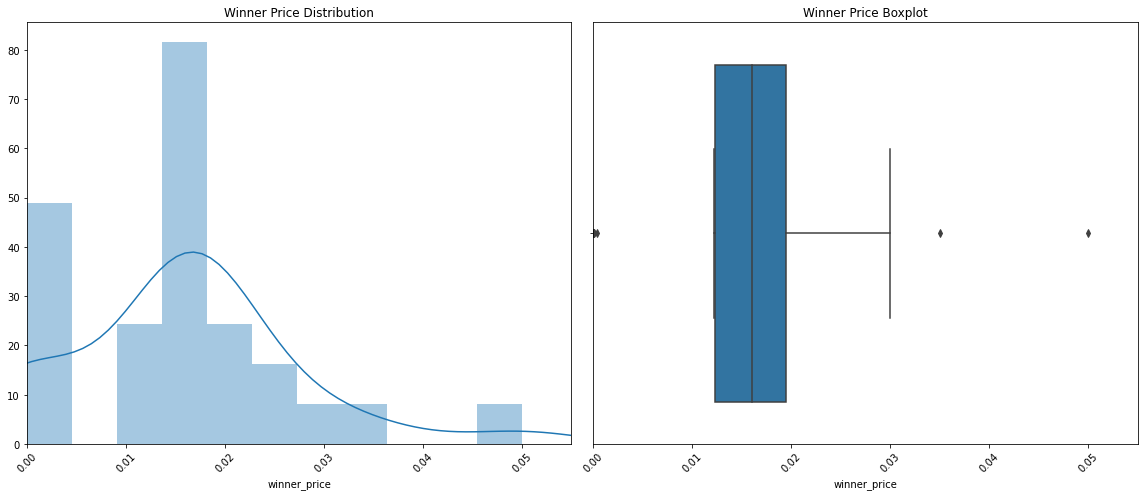

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,7))

sns.distplot(df['winner_price'], ax=ax[0])
ax[0].set_title('Winner Price Distribution')
ax[0].set(xlim=(0, df['winner_price'].max()*1.1))
ax[0].tick_params(axis='x', rotation=45)

sns.boxplot(df['winner_price'], ax=ax[1])
ax[1].set_title('Winner Price Boxplot')
ax[1].set(xlim=(0, df['winner_price'].max()*1.1))
ax[1].tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.show()

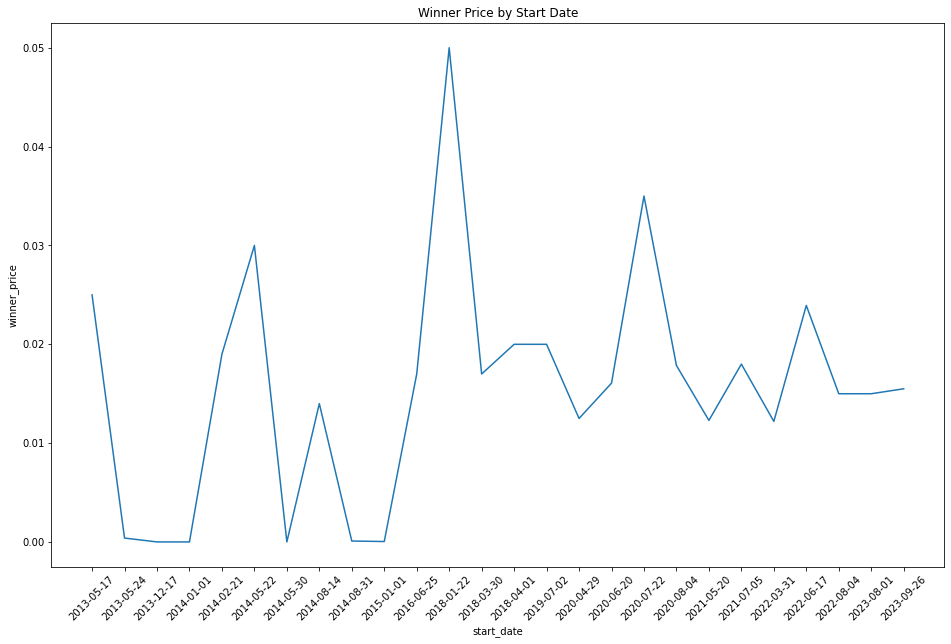

In [16]:
plt.subplots(figsize=(16,10))

sns.lineplot(data=df, x="start_date", y="winner_price").set_title('Winner Price by Start Date')
plt.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.show()

## Static Threshold Removal

### I'm not familiar enough with the data to know for sure if these are outliers but I suspect they are so I'm going to remove them. Due to the small volume of data, methods like using Z-Scores or Interquartile ranges arent too effective.


In [17]:
winner_price_lower_bound = 0.001
winner_price_upper_bound = 0.05
df = df.drop(df[df['winner_price'] < winner_price_lower_bound].index)
df = df.drop(df[df['winner_price'] > winner_price_upper_bound].index)
df = df[df['winner_price'].notna()]
df

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price,actual_months
2,3,2013-06-09,2014-08-14,6,won,lost,buyer_3,region_3,C07AB07,12,...,molecule_x,10mg,participants_16|participants_23,0.014|0.07071,2013-06-01,participants_16,0.01400,participants_23,0.070710,18
3,4,2013-05-04,2013-05-17,19,won,NaN,buyer_4,region_4,C07AB07,36,...,molecule_x,10mg,participants_16,0.025,2013-05-01,participants_16,0.02500,NaN,NaN,55
5,6,2013-12-06,2014-02-21,14,won,NaN,buyer_6,region_6,C07AB07,48,...,molecule_x,10mg,participants_16,0.019,2013-12-01,participants_16,0.01900,NaN,NaN,61
7,8,2014-03-08,2014-05-22,10,won,lost,buyer_8,region_8,C07AB07,36,...,molecule_x,10mg,participants_16|participants_5|participants_6|...,0.03|0.08|0.034|0.04066,2014-03-01,participants_16,0.03000,participants_6,0.034000,45
12,13,2016-04-13,2016-06-25,6,won,lost,buyer_11,region_11,C07AB07,36,...,molecule_x,10mg,participants_6|participants_16|participants_23...,0.01699|0.07|0.06802|0.075,2016-04-01,participants_6,0.01699,participants_23,0.068020,41
14,15,2017-12-01,2018-01-22,12,won,NaN,buyer_13,region_13,C07AB07,36,...,molecule_x,10mg,participants_16,0.05,2017-12-01,participants_16,0.05000,NaN,NaN,47
15,16,2017-12-29,2018-03-30,26,won,lost,buyer_14,region_4,C07AB07,48,...,molecule_x,10mg,participants_16|participants_4,0.017|0.0242,2017-12-01,participants_16,0.01700,participants_4,0.024200,74
16,17,2018-05-31,2018-04-01,2,won,lost,buyer_5,region_5,C07AB07,24,...,molecule_x,10mg,participants_16|participants_7,0.02|0.9993156095718888,2018-05-01,participants_16,0.02000,participants_7,0.999316,25
17,18,2019-05-26,2019-07-02,6,won,lost,buyer_3,region_3,C07AB07,36,...,molecule_x,10mg,participants_16|participants_19,0.02|0.8665684755636098,2019-05-01,participants_16,0.02000,participants_19,0.866568,42
18,19,2020-01-01,2020-08-04,0,won,lost,buyer_11,region_11,C07AB07,36,...,molecule_x,10mg,participants_19|participants_16|participants_23,0.01786|0.07|0.06511,2020-01-01,participants_19,0.01786,participants_23,0.065110,35


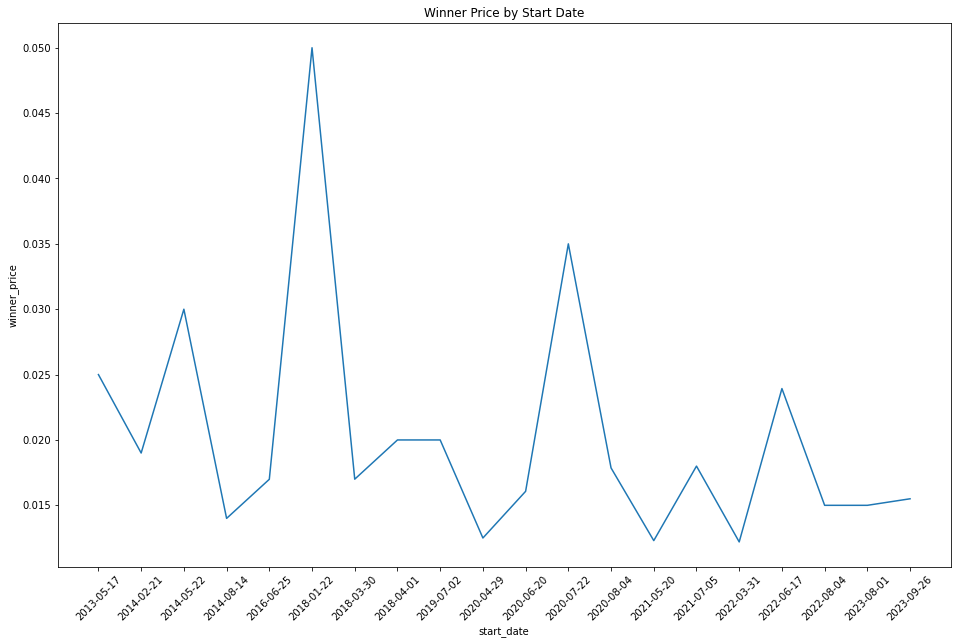

In [18]:
plt.subplots(figsize=(16,10))

sns.lineplot(data=df, x="start_date", y="winner_price").set_title('Winner Price by Start Date')
plt.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.show()

## Imputing Missing Data

In [19]:
# dummy data to show it works with more skus
# df.loc[df['contract_id'].isin([30,31]), 'sku'] = 'TEST_SKU'
# df.loc[df['contract_id'].isin([30]), 'atc'] = 'TEST_ATC'
# df['sku']

In [20]:
df['atc'] = df.groupby(['sku'])['atc'].apply(lambda x: x.fillna(x.mode()[0]))
df

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price,actual_months
2,3,2013-06-09,2014-08-14,6,won,lost,buyer_3,region_3,C07AB07,12,...,molecule_x,10mg,participants_16|participants_23,0.014|0.07071,2013-06-01,participants_16,0.01400,participants_23,0.070710,18
3,4,2013-05-04,2013-05-17,19,won,NaN,buyer_4,region_4,C07AB07,36,...,molecule_x,10mg,participants_16,0.025,2013-05-01,participants_16,0.02500,NaN,NaN,55
5,6,2013-12-06,2014-02-21,14,won,NaN,buyer_6,region_6,C07AB07,48,...,molecule_x,10mg,participants_16,0.019,2013-12-01,participants_16,0.01900,NaN,NaN,61
7,8,2014-03-08,2014-05-22,10,won,lost,buyer_8,region_8,C07AB07,36,...,molecule_x,10mg,participants_16|participants_5|participants_6|...,0.03|0.08|0.034|0.04066,2014-03-01,participants_16,0.03000,participants_6,0.034000,45
12,13,2016-04-13,2016-06-25,6,won,lost,buyer_11,region_11,C07AB07,36,...,molecule_x,10mg,participants_6|participants_16|participants_23...,0.01699|0.07|0.06802|0.075,2016-04-01,participants_6,0.01699,participants_23,0.068020,41
14,15,2017-12-01,2018-01-22,12,won,NaN,buyer_13,region_13,C07AB07,36,...,molecule_x,10mg,participants_16,0.05,2017-12-01,participants_16,0.05000,NaN,NaN,47
15,16,2017-12-29,2018-03-30,26,won,lost,buyer_14,region_4,C07AB07,48,...,molecule_x,10mg,participants_16|participants_4,0.017|0.0242,2017-12-01,participants_16,0.01700,participants_4,0.024200,74
16,17,2018-05-31,2018-04-01,2,won,lost,buyer_5,region_5,C07AB07,24,...,molecule_x,10mg,participants_16|participants_7,0.02|0.9993156095718888,2018-05-01,participants_16,0.02000,participants_7,0.999316,25
17,18,2019-05-26,2019-07-02,6,won,lost,buyer_3,region_3,C07AB07,36,...,molecule_x,10mg,participants_16|participants_19,0.02|0.8665684755636098,2019-05-01,participants_16,0.02000,participants_19,0.866568,42
18,19,2020-01-01,2020-08-04,0,won,lost,buyer_11,region_11,C07AB07,36,...,molecule_x,10mg,participants_19|participants_16|participants_23,0.01786|0.07|0.06511,2020-01-01,participants_19,0.01786,participants_23,0.065110,35


## Clean Participants Price

In [21]:
def price_fix(x):
    return "|".join(["{:.05f}".format(float(str(i))) for i in x.split('|')])

In [22]:
df['participants_price'] = df['participants_price'].apply(price_fix) 
df

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price,actual_months
2,3,2013-06-09,2014-08-14,6,won,lost,buyer_3,region_3,C07AB07,12,...,molecule_x,10mg,participants_16|participants_23,0.01400|0.07071,2013-06-01,participants_16,0.01400,participants_23,0.070710,18
3,4,2013-05-04,2013-05-17,19,won,NaN,buyer_4,region_4,C07AB07,36,...,molecule_x,10mg,participants_16,0.02500,2013-05-01,participants_16,0.02500,NaN,NaN,55
5,6,2013-12-06,2014-02-21,14,won,NaN,buyer_6,region_6,C07AB07,48,...,molecule_x,10mg,participants_16,0.01900,2013-12-01,participants_16,0.01900,NaN,NaN,61
7,8,2014-03-08,2014-05-22,10,won,lost,buyer_8,region_8,C07AB07,36,...,molecule_x,10mg,participants_16|participants_5|participants_6|...,0.03000|0.08000|0.03400|0.04066,2014-03-01,participants_16,0.03000,participants_6,0.034000,45
12,13,2016-04-13,2016-06-25,6,won,lost,buyer_11,region_11,C07AB07,36,...,molecule_x,10mg,participants_6|participants_16|participants_23...,0.01699|0.07000|0.06802|0.07500,2016-04-01,participants_6,0.01699,participants_23,0.068020,41
14,15,2017-12-01,2018-01-22,12,won,NaN,buyer_13,region_13,C07AB07,36,...,molecule_x,10mg,participants_16,0.05000,2017-12-01,participants_16,0.05000,NaN,NaN,47
15,16,2017-12-29,2018-03-30,26,won,lost,buyer_14,region_4,C07AB07,48,...,molecule_x,10mg,participants_16|participants_4,0.01700|0.02420,2017-12-01,participants_16,0.01700,participants_4,0.024200,74
16,17,2018-05-31,2018-04-01,2,won,lost,buyer_5,region_5,C07AB07,24,...,molecule_x,10mg,participants_16|participants_7,0.02000|0.99932,2018-05-01,participants_16,0.02000,participants_7,0.999316,25
17,18,2019-05-26,2019-07-02,6,won,lost,buyer_3,region_3,C07AB07,36,...,molecule_x,10mg,participants_16|participants_19,0.02000|0.86657,2019-05-01,participants_16,0.02000,participants_19,0.866568,42
18,19,2020-01-01,2020-08-04,0,won,lost,buyer_11,region_11,C07AB07,36,...,molecule_x,10mg,participants_19|participants_16|participants_23,0.01786|0.07000|0.06511,2020-01-01,participants_19,0.01786,participants_23,0.065110,35


In [23]:
df.to_csv('output.tsv', sep="\t") 